In [61]:
from scipy.io import arff
import numpy as np
import pandas as pd
from scipy import stats

#import data
data = arff.loadarff('segment.arff')
df = pd.DataFrame(data[0])

#split into x and y
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_names = list(x)

#normalizing the data

#np version of data
x_norm = stats.zscore(x)
np.nan_to_num(x_norm, copy=False)

#pd version of data
X = pd.DataFrame(x_norm, columns=x_names) 

C:\Users\Yofftop\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [63]:
#Euclidian Distance Function

def dist(centroid, data):
    
    equation_factor = np.sum(np.square(centroid)[:,np.newaxis,:], axis=2) - 2 * centroid.dot(data.T) + np.sum(np.square(data), axis=1)
    euc_dist = np.sqrt(equation_factor.astype(float))
    
    return euc_dist

In [64]:
import statistics as stats

#Clustering
#https://fordham.blackboard.com/bbcswebdav/pid-2740175-dt-content-rid-11634848_1/courses/33262.CISC6930L02.201910/clustering2_no_pause.pdf

#Number of Clusters
ks = [1,2,3,4,5,6,7,8,9,10,11,12] 

#Centroids
centroids = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328, 1160, 108, 422, 88, 105, 261, 212,1941, 1724, 704, 1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168, 566, 1812, 214,53, 423, 50, 705, 1284, 1356, 996, 1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424,1790, 633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1, 371, 758, 332, 542, 672, 483,
65, 92, 400, 1079, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954, 1818, 1679,832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425, 610, 1353, 1772, 908,1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121, 1740, 287, 1383, 1923,1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233, 1846,
1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643, 1692, 1389, 120, 1034, 805, 266,339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178, 774, 1623, 1641,661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356, 541, 1455, 741, 583, 1464, 209,1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148, 1697, 1785, 298, 1485,
945, 1097, 207, 857, 1758, 1390, 172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427,1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628, 167, 1042, 1887, 1825, 249, 240,524, 1098, 311, 337, 220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 613, 152,1440, 473, 1834, 1387, 1656, 1028, 1106, 829, 1591, 1699, 1674, 947, 77, 468, 997, 611,
1776, 123, 979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442, 1588, 1033, 79, 1686,854, 257, 1460, 1380, 495, 1701, 1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737,1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]

max_i = 50

mean_SSE = []
stdev_SSE = []

for k in ks:
    
    SSE_list = []
    p = 0

    for r in range(25):

        #Create Dictionary for Classifications
        classification = {}

        cent_data = np.empty((19,), int)

        for i in range(k):
            cent = centroids[i+p]
            classification[i] = []
            cent_data = np.append(cent_data, x_norm[cent], axis=0)
#             print(cent)
        p += k

        cent_data = cent_data[19:] 
        cent_data = np.reshape(cent_data,(k,19))

        #Distance Matrix
        dist_trix = dist(cent_data, x_norm)

        for i in range(dist_trix.shape[1]):

            distances = []
            cent_list = []

            for j in range(k): 

                distances.append(dist_trix[j][i])
                cent_list.append(j)

            mindist_ind = distances.index(min(distances))
            classification[cent_list[mindist_ind]].append(i)

        #Rerun until converge
        t = 1

        prev_classification = {}
#         distance = 0

        while prev_classification != classification:

            t += 1
            prev_classification = classification

            # Update Centroids By Taking The Mean
            cent_mean = np.empty((19,), int)

            for i in range(k):

                cent_total = np.empty((19,), int)

                for j in classification[i]:

                    cent_total = np.append(cent_total, x_norm[j], axis=0)

                cent_total = cent_total[19:] 
                cent_total = np.reshape(cent_total,(len(classification[i]),19))
                cent_mean = np.append(cent_mean, np.mean(cent_total,axis=0))

            cent_mean = cent_mean[19:] 
            cent_mean = np.reshape(cent_mean,(k,19))

            #Create Dictionary for Classifications
            classification = {}

            for i in range(k):
                classification[i] = []

            #Distance Matrix
            dist_trix = dist(cent_mean, x_norm)

            for i in range(dist_trix.shape[1]):

                distances = []
                cent_list = []

                for j in classification: 

                    distances.append(dist_trix[j][i])
                    cent_list.append(j)

                mindist_ind = distances.index(min(distances))
                classification[cent_list[mindist_ind]].append(i)

            if t > 50:
                break  
        
        #SSE
        distance = 0
        for i in classification:
            
            for j in classification[i]:
            
                distance += (dist_trix[i][j])**2

        SSE_list.append(distance)

    mean_SSE.append(sum(SSE_list) / len(SSE_list))

    stdev_SSE.append(stats.stdev(SSE_list))
    
    if k == 1:
        d = dist_trix

C:\Users\Yofftop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


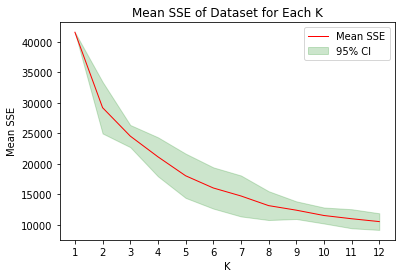

     K      Mean SSE    low_CI_95%  upper_CI_95%
0    1  41580.000000  41580.000000  41580.000000
1    2  29217.663484  24990.564989  33444.761979
2    3  24561.637880  22745.115748  26378.160012
3    4  21167.024366  17968.039464  24366.009268
4    5  18060.786410  14431.707263  21689.865558
5    6  16059.293853  12680.151549  19438.436158
6    7  14750.240782  11394.725367  18105.756197
7    8  13166.798484  10804.983701  15528.613267
8    9  12421.457067  10973.498025  13869.416109
9   10  11547.345846  10238.718378  12855.973314
10  11  11017.407892   9455.674290  12579.141493
11  12  10549.376185   9185.085649  11913.666721


In [65]:
'''1.A - Generate a line plot of the mean SSE (µk) as a function of k. 
Include error bars that indicate the 95% conﬁdence interval: (µk −2σk to µk + 2σk).  
'''

import matplotlib.pyplot as plt

low_ci = []
high_ci = []
for i,j in zip(mean_SSE, stdev_SSE):
    low_ci.append(i - 2*j)
    high_ci.append(i + 2*j)

df = pd.DataFrame(columns = ['K', 'Mean SSE', 'low_CI_95%', 'upper_CI_95%'])
df['K'] = ks
df['Mean SSE'] = mean_SSE
df['low_CI_95%'] = low_ci
df['upper_CI_95%'] = high_ci

# Create the plot object
_, ax = plt.subplots()

ax.plot(ks, mean_SSE, lw = 1, color = 'red', alpha = 1, label = 'Mean SSE')
ax.fill_between(ks, low_ci, high_ci, color = 'green', alpha = 0.2, label = '95% CI')
ax.set_title("Mean SSE of Dataset for Each K")
ax.set_xlabel("K")
ax.set_ylabel("Mean SSE")
plt.xticks(ks)
ax.legend(loc = 'best')
plt.show()

#1.2 Produce Table
print(df)



[[1.]]


2


[[3.91233416 3.71326665 5.99655004 ... 2.78683895 3.69699646 3.17138986]]


3.91233416354981
